In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow
from keras.models import Sequential

Using TensorFlow backend.


In [3]:
import seaborn as sns

In [4]:
white = pd.read_csv('Neural_Nets/winequality-white.csv', sep=';')
red = pd.read_csv('Neural_Nets/winequality-red.csv', sep=';')

In [5]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


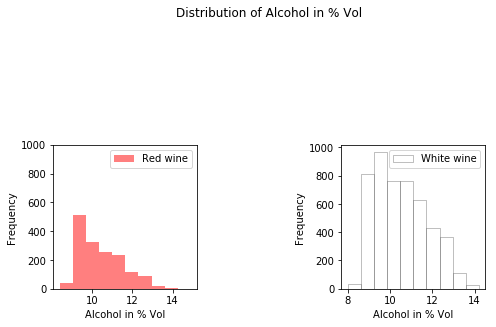

In [8]:
fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
ax[0].legend(loc='best')
ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

In [9]:

print(np.histogram(red.alcohol, bins=[7,8,9,10,11,12,13,14,15]))
print(np.histogram(white.alcohol, bins=[7,8,9,10,11,12,13,14,15]))

(array([  0,   7, 673, 452, 305, 133,  21,   8]), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))
(array([   0,  317, 1606, 1256,  906,  675,  131,    7]), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))


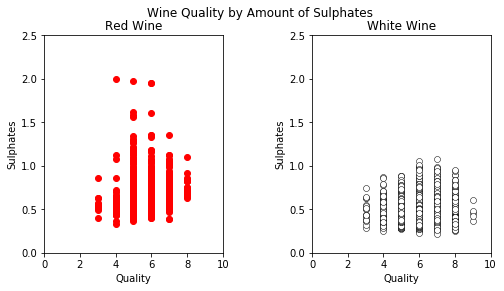

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(red['quality'], red["sulphates"], color="red")
ax[1].scatter(white['quality'], white['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")

plt.show()

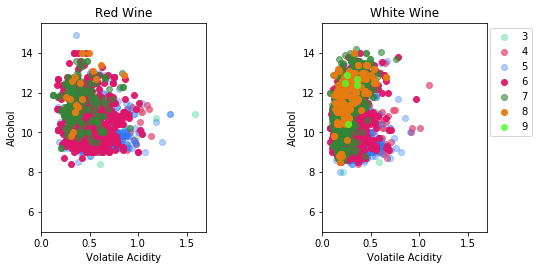

In [11]:
np.random.seed(570)

redlabels = np.unique(red['quality'])
whitelabels = np.unique(white['quality'])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
redcolors = np.random.rand(6,4)
whitecolors = np.append(redcolors, np.random.rand(1,4), axis=0)

for i in range(len(redcolors)):
    redy = red['alcohol'][red.quality == redlabels[i]]
    redx = red['volatile acidity'][red.quality == redlabels[i]]
    ax[0].scatter(redx, redy, c=redcolors[i])
for i in range(len(whitecolors)):
    whitey = white['alcohol'][white.quality == whitelabels[i]]
    whitex = white['volatile acidity'][white.quality == whitelabels[i]]
    ax[1].scatter(whitex, whitey, c=whitecolors[i])
    
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlim([0,1.7])
ax[1].set_xlim([0,1.7])
ax[0].set_ylim([5,15.5])
ax[1].set_ylim([5,15.5])
ax[0].set_xlabel("Volatile Acidity")
ax[0].set_ylabel("Alcohol")
ax[1].set_xlabel("Volatile Acidity")
ax[1].set_ylabel("Alcohol") 
#ax[0].legend(redlabels, loc='best', bbox_to_anchor=(1.3, 1))
ax[1].legend(whitelabels, loc='best', bbox_to_anchor=(1.3, 1))
#fig.suptitle("Alcohol - Volatile Acidity")
fig.subplots_adjust(top=0.85, wspace=0.7)

plt.show()

In [12]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

In [13]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,1
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5,1
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5,1
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,6,1
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,1
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5,1
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,5,1
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,7,1
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,7,1
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,1


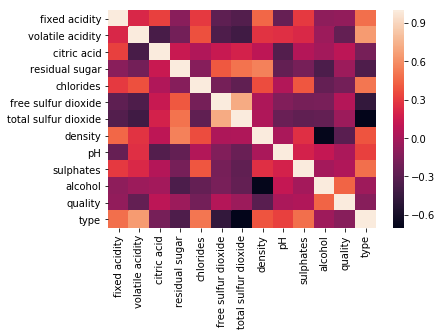

In [14]:

corr = wines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [15]:
# Specify the data 
X=wines.ix[:,0:11]

# Specify the target labels and flatten the array 
y=np.ravel(wines.type)

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

/home/warrenc/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


In [16]:
# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [4]:
blocks = pd.read_csv('master_data_7_31_17_w_blocks.csv', low_memory=False)

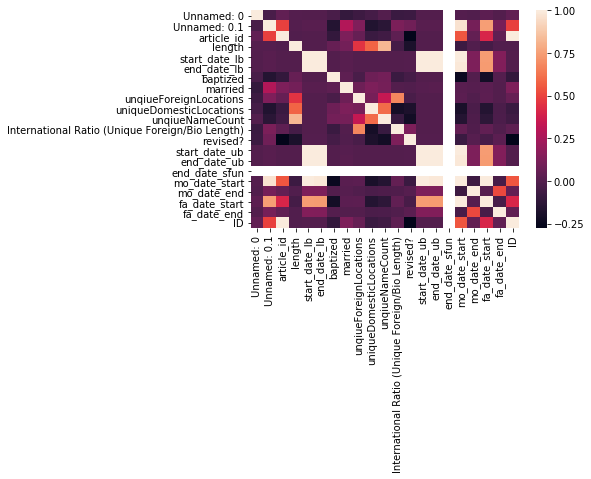

In [18]:

corr = blocks.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [19]:
blocks.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'article_id', 'length', 'start_date_lb',
       'start_date', 'end_date_lb', 'end_date', 'e_ed', 'name', 'fname',
       'gender', 'baptized', 'married', 'occupation', 'unqiueForeignLocations',
       'uniqueDomesticLocations', 'unqiueNameCount',
       'International Ratio (Unique Foreign/Bio Length)', 'mo_occ', 'fa_occ',
       'faith', 'denom', 'revised?', 'start_date_ub', 'end_date_ub',
       'start_date_ad', 'start_date_bc', 'start_date_pf', 'start_date_sf',
       'start_date_sfun', 'start_date_ty', 'end_date_ad', 'end_date_bc',
       'end_date_pf', 'end_date_sf', 'end_date_sfun', 'end_date_ty', 'fa_name',
       'mo_name', 'mo_date_start', 'mo_date_end', 'fa_date_start',
       'fa_date_end', 'wealth_sym', 'wealth_value', 'wealth_date',
       'wealth_src', 'con_id', 'con_name', 'category', 'ID', 'Block',
       'Section'],
      dtype='object')

In [5]:
blocks = blocks[['gender', 'baptized', 'married', 'faith', 'Block', 'Section','category']]
blocks = blocks.dropna()
#blocks.get_dummies()

In [6]:
dummies = pd.get_dummies(blocks)

In [7]:

corr = dummies.corr()


In [8]:
corr.to_csv('odnb_correlations.csv')

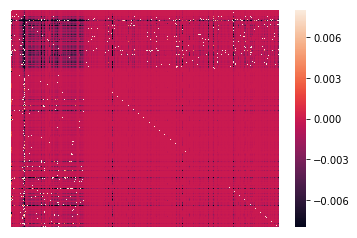

In [21]:
sns.heatmap(corr, vmax=.008, vmin=-.008,
            xticklabels=False,
            yticklabels=False
            )
plt.show()

In [23]:
corr

,baptized,married,gender_f,gender_m,faith_Bah',faith_Buddhist,faith_Chistian,faith_Christian,faith_Christian Scientist,faith_Christianity,...,category_Technology; Transport and Communication,category_Technology; Travel and Exploration,category_Theatre and Live Entertainment,category_Trade and Retailing,category_Trade and Retailing; Transport and Communication,category_Trade and Retailing; Transport and Communication; Travel and Exploration,category_Trade and Retailing; Travel and Exploration,category_Transport and Communication,category_Transport and Communication; Travel and Exploration,category_Travel and Exploration
count,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,...,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000
mean,0.000422,0.002038,0.000799,-0.000799,0.000580,0.000722,0.000656,-0.003347,0.000559,0.000827,...,0.000506,0.000523,0.000576,-0.000106,0.000398,0.000444,0.000525,0.000174,0.000345,-0.000063
std,0.026670,0.030570,0.038650,0.038650,0.024514,0.025056,0.024785,0.036475,0.024278,0.026196,...,0.024567,0.024145,0.026772,0.025885,0.024448,0.024413,0.025209,0.025840,0.025565,0.025326
min,-0.096665,-0.323171,-1.000000,-1.000000,-0.022822,-0.096844,-0.022822,-0.697489,-0.022822,-0.075700,...,-0.005509,-0.002464,-0.032724,-0.026734,-0.009219,-0.006969,-0.008723,-0.014076,-0.012566,-0.020752
25%,-0.003513,0.002300,-0.003794,0.000861,-0.000153,-0.000612,-0.000153,-0.002717,-0.000153,-0.000493,...,-0.000337,-0.000153,-0.001224,-0.001981,-0.000563,-0.000426,-0.000556,-0.001253,-0.000758,-0.001768
50%,-0.001756,0.002300,-0.001636,0.001636,-0.000049,-0.000182,-0.000049,0.001084,-0.000049,-0.000164,...,-0.000111,-0.000049,-0.000369,-0.000663,-0.000185,-0.000140,-0.000185,-0.000417,-0.000252,-0.000533
75%,0.001567,0.005622,-0.000861,0.003794,-0.000025,-0.000105,-0.000025,0.002424,-0.000025,-0.000082,...,-0.000055,-0.000025,-0.000213,-0.000383,-0.000093,-0.000070,-0.000093,-0.000209,-0.000126,-0.000308
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


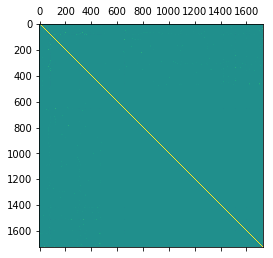

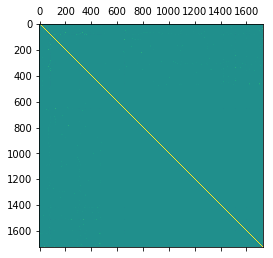

In [25]:
plt.matshow(corr)
plt.show()